### OBTENÇÃO DE DADOS

In [1]:
#Importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importar arquivo
df = pd.read_csv("listings.csv")

### Análise de Dados


## ANÁLISE DE DADOS

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimendo de como os dados estão estruturados

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.29,3,351,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,2019-12-02,0.29,2,151,0,NaN
2,6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,2023-08-14,1.09,1,79,5,NaN
3,6872,Condo in New York · 1 bedroom · 1 bed · 1 shar...,16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65,30,1,2022-06-05,0.06,2,295,0,NaN
4,7064,Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...,17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,95,30,13,2022-09-12,0.08,2,26,0,NaN


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` número de reviews, nos últimos 12 meses.
* `license` - licença do imóvel
  
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

#### *Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais são os tipos das variáveis.

In [4]:
#Identificar o volume de dados do DataFrame
print(f"Entradas: \t {df.shape[0]}")
print(f"Variáveis: \t {df.shape[1]}")

Entradas: 	 38792
Variáveis: 	 18


São quase 39 mil linhas, e 18 variáveis

In [5]:
#Veriricar os tipos de variáveis
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

- 8 variáveis do tipo `int`
- 7 variáveis do tipo `object`
- 3 Variáveis do tipo `float`

#### Q2. Qual a porcentagem de valores ausentes no *dataset*?

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores são significativos comparados ao total de entradas.

In [6]:
#Quantidade de valores null por linha
display(df.isnull().sum().sort_values(ascending=False))

license                           35853
reviews_per_month                 10352
last_review                       10352
host_name                             5
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
id                                    0
name                                  0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
price                                 0
dtype: int64

In [7]:
#Verificando a proporção de valores nulos em relação ao total de entradas
por = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
por.round(2)


license                           92.42
reviews_per_month                 26.69
last_review                       26.69
host_name                          0.01
minimum_nights                     0.00
number_of_reviews_ltm              0.00
availability_365                   0.00
calculated_host_listings_count     0.00
number_of_reviews                  0.00
id                                 0.00
name                               0.00
room_type                          0.00
longitude                          0.00
latitude                           0.00
neighbourhood                      0.00
neighbourhood_group                0.00
host_id                            0.00
price                              0.00
dtype: float64

`License` possui cerca de 35 mil valores nulos, enquanto `last_review` and `review_per_month` possuem cerca de 10 mil valores nulos. 
É também possível observar que a variável `license` tem uma taxa altíssima de valores nulos, visto que a proporção é de 92%. Enquanto `reviews_per_month` e `last_review` também possuem cerca de 1/4 dos valores nulos.

### Q3. Qual a o tipo de distribuição das variáveis?

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

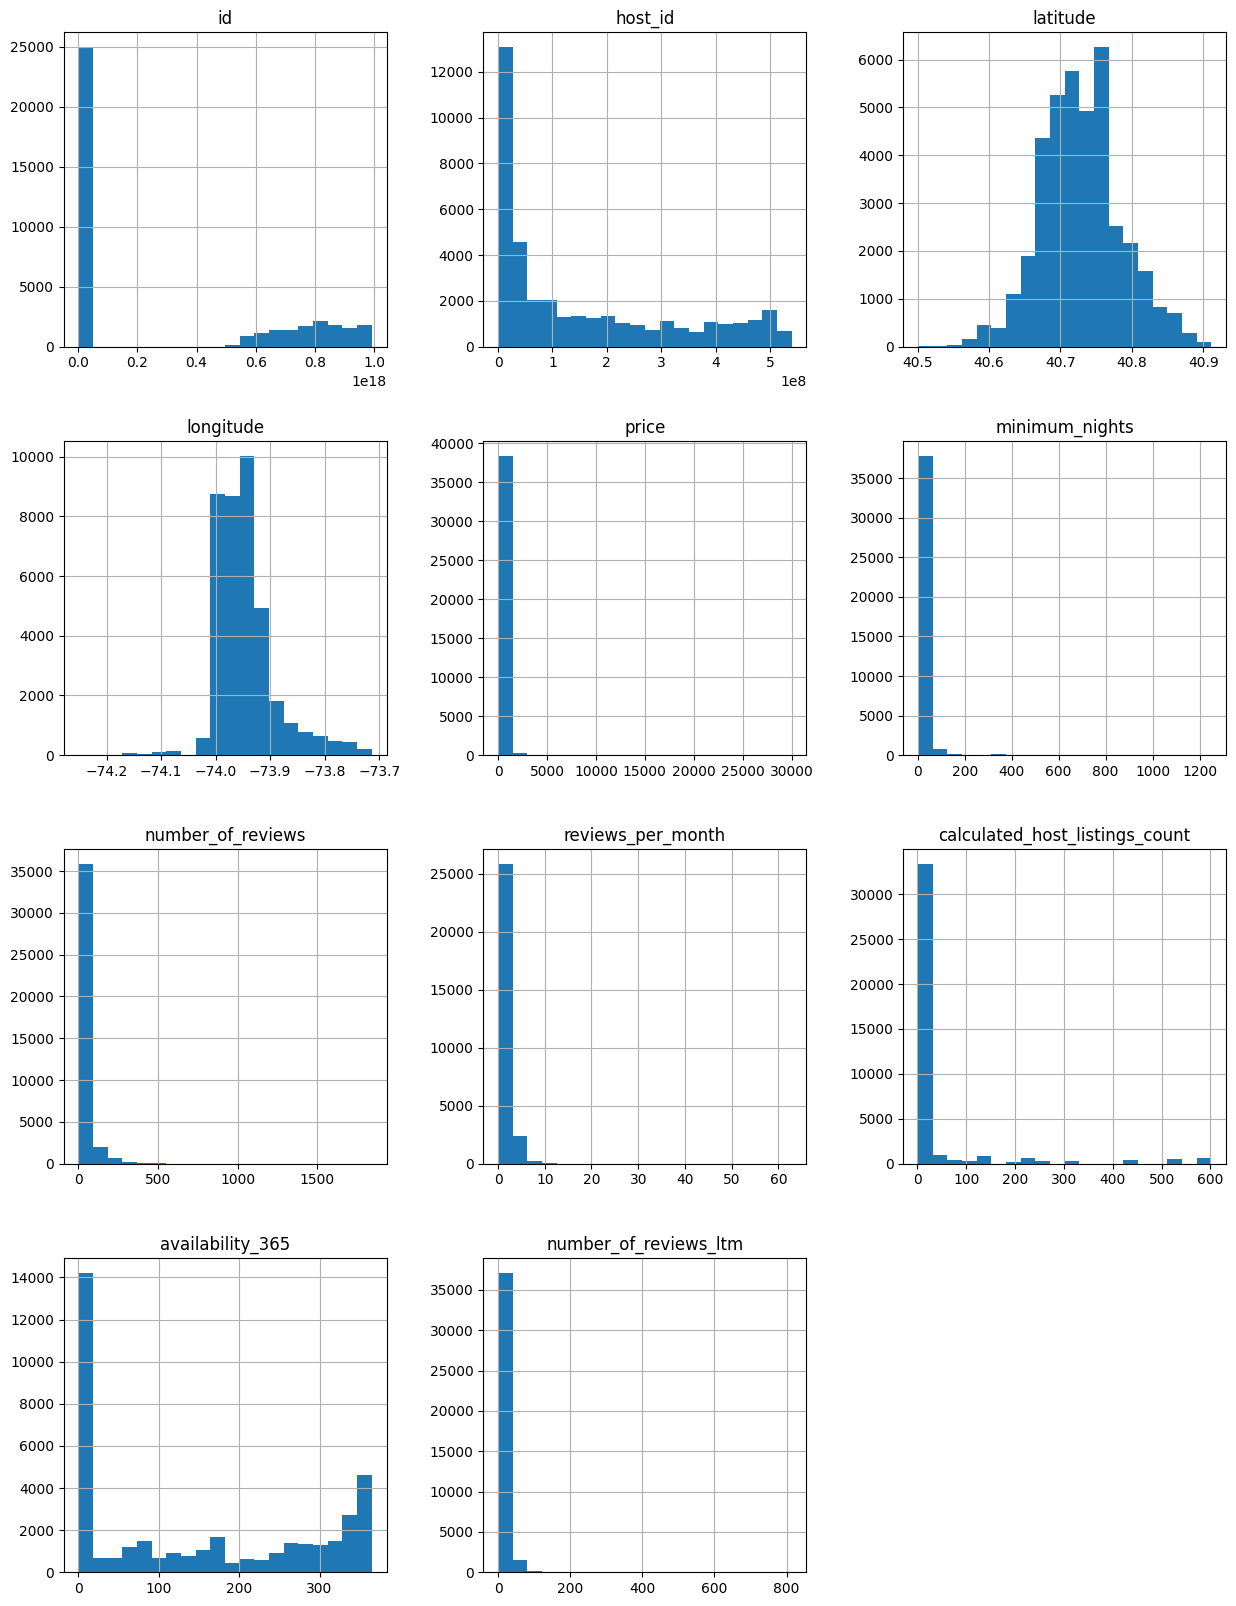

In [8]:
#Plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15,20))


Percebe-se que alguns valores como, `price`, `minimum_nighits`, `reviews_per_month` e ademais,praticamente não seguem uma distribuição.  Isso pode distorcer a análise gráfica. Também podendo ser indícios de outliers.

### Q4. Há outilers presentes?
Há duas maneiras rápidas que auxiliam a detecção de outilers. São elas
* Resumo estático por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [9]:
#Ver o resumo estatístico das variáveis numéricas
df[
    ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']
].describe().round(2)

    


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,38792.00,38792.00,38792.00,28440.00,38792.00,38792.00,38792.00
mean,215.95,30.64,25.36,1.08,38.58,148.75,6.95
std,496.01,26.63,55.85,1.65,113.31,142.26,16.63
min,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,79.00,30.00,0.00,0.11,1.00,0.00,0.00
50%,135.00,30.00,4.00,0.41,1.00,120.00,0.00
75%,225.00,30.00,24.00,1.52,6.00,300.00,5.00
max,30000.00,1250.00,1843.00,62.82,602.00,365.00,814.00


Olhando o resumo acima, é possível confirmar algumas hipóteses como: 
* A variável `price` possui 75% do valor abaixo de 225, porém o valor máximo é 30000. Está discrepâncias se repete para outras variáveis, indicando a possível presença de outilers.

In [10]:
#Função para ver entradas
def entradas(variavel, teto):
    print(f"{variavel}: valores acima de {teto}")
    print("{} entradas".format(len(df[df[variavel] > teto])))
    print("{:.2f}%".format((len(df[df[variavel] > teto]) / df.shape[0]) * 100)) 


#Reserve code
#print(f"{len(df[df['price'] > 10000])}")
#print("{:.2f}%".format((len(df[df['price'] > 10000]) / df.shape[0]) * 100)) 
#print("price: valores acima de 10000")

##### Boxplot para `price` e `minimum_nights`

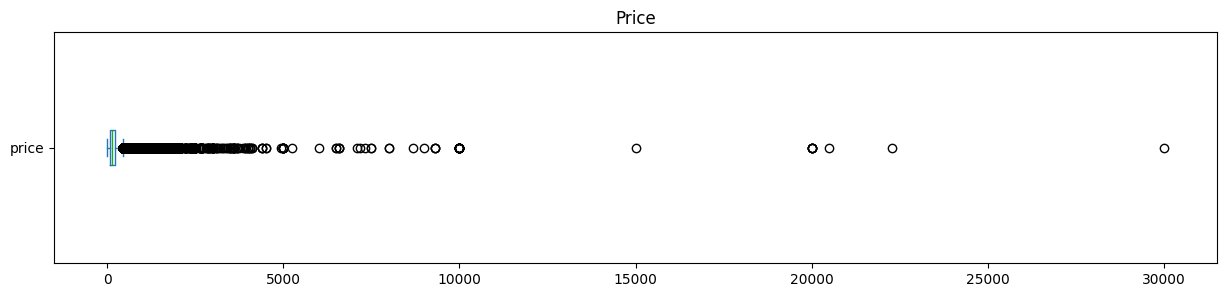

price: valores acima de 5000
45 entradas
0.12%


In [11]:
#price
df['price'].plot(kind='box', vert=False, figsize=(15,3), title='Price')
plt.show()

entradas('price', 5000)

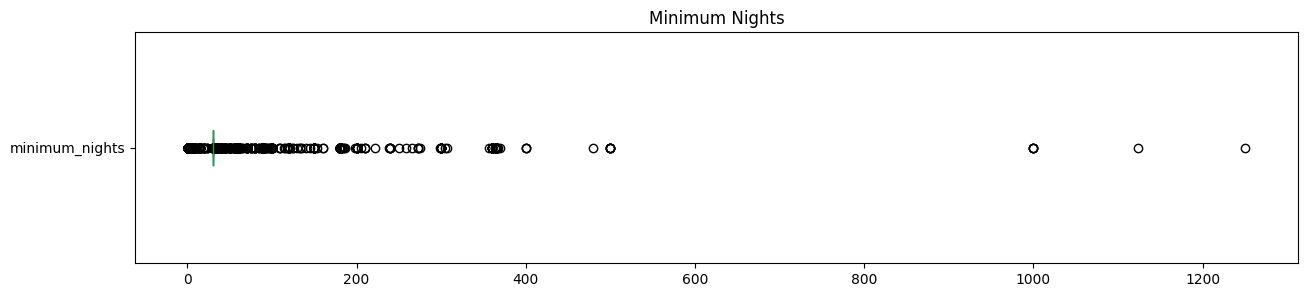

minimum_nights: valores acima de 250
121 entradas
0.31%


In [12]:
#Minimum nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3), title='Minimum Nights')
plt.show()

entradas('minimum_nights',250)


#### Box plot, para `number_of_reviews` e `number_of_reviews_ltm` e `reviews_per_month`
É possível notar também, que a 75% dos valores em `number_of_reviews_ltm` vão até 5. Porém metade das entradas não apresentas nenhuma análise.

Enquanto em `number_of_reviews` 75% dos valores apresentam até 24 análises para o imóvel, 50% apresentam até 4 análises.
Além de ser possível notar o valores exuberantes de 814 e 1843 para as variáveis respectivamente



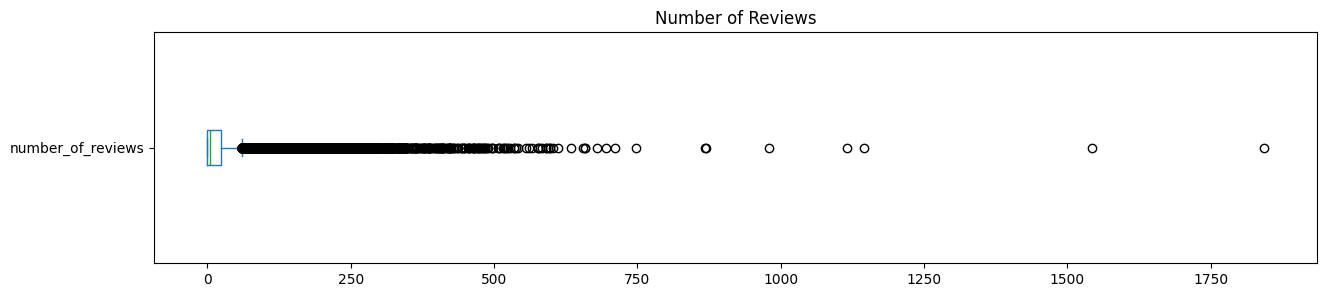

number_of_reviews: valores acima de 600
17 entradas
0.04%


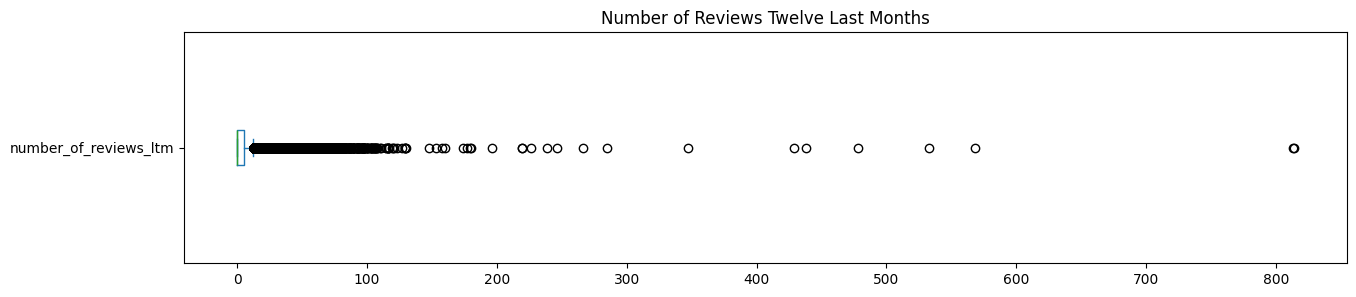

number_of_reviews_ltm: valores acima de 150
23 entradas
0.06%


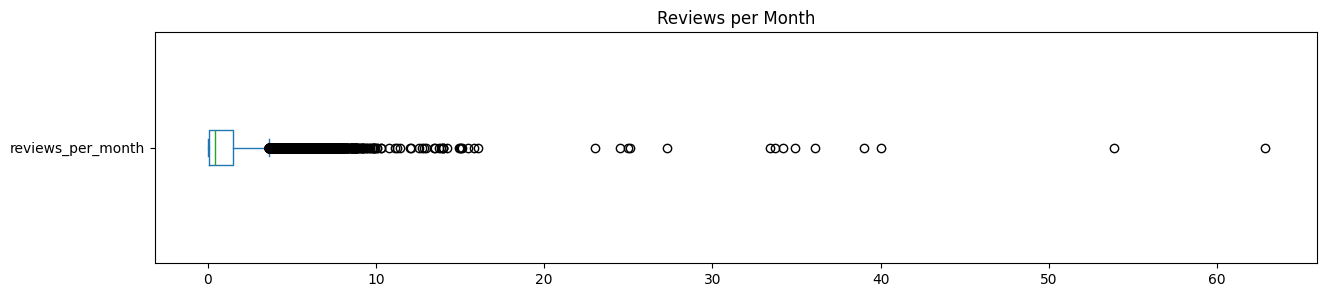

reviews_per_month: valores acima de 15
19 entradas
0.05%


In [13]:
df.number_of_reviews.plot(kind='box',vert=False, figsize=(15,3), title='Number of Reviews')
plt.show()
entradas("number_of_reviews", 600)

df.number_of_reviews_ltm.plot(kind='box',vert=False, figsize=(15,3), title='Number of Reviews Twelve Last Months')
plt.show()
entradas("number_of_reviews_ltm", 150)

df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3), title='Reviews per Month')
plt.show()
entradas("reviews_per_month", 15)


#### Histogramas sem outilers
Já que identificamos outilers nas variáveis `price` e `minimum_nights`, `number_of_reviews`,`number_of_reviews_ltm`,`reviews_per_month` vamos agora limpar o *DataFrame* delas e plotar novamente

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

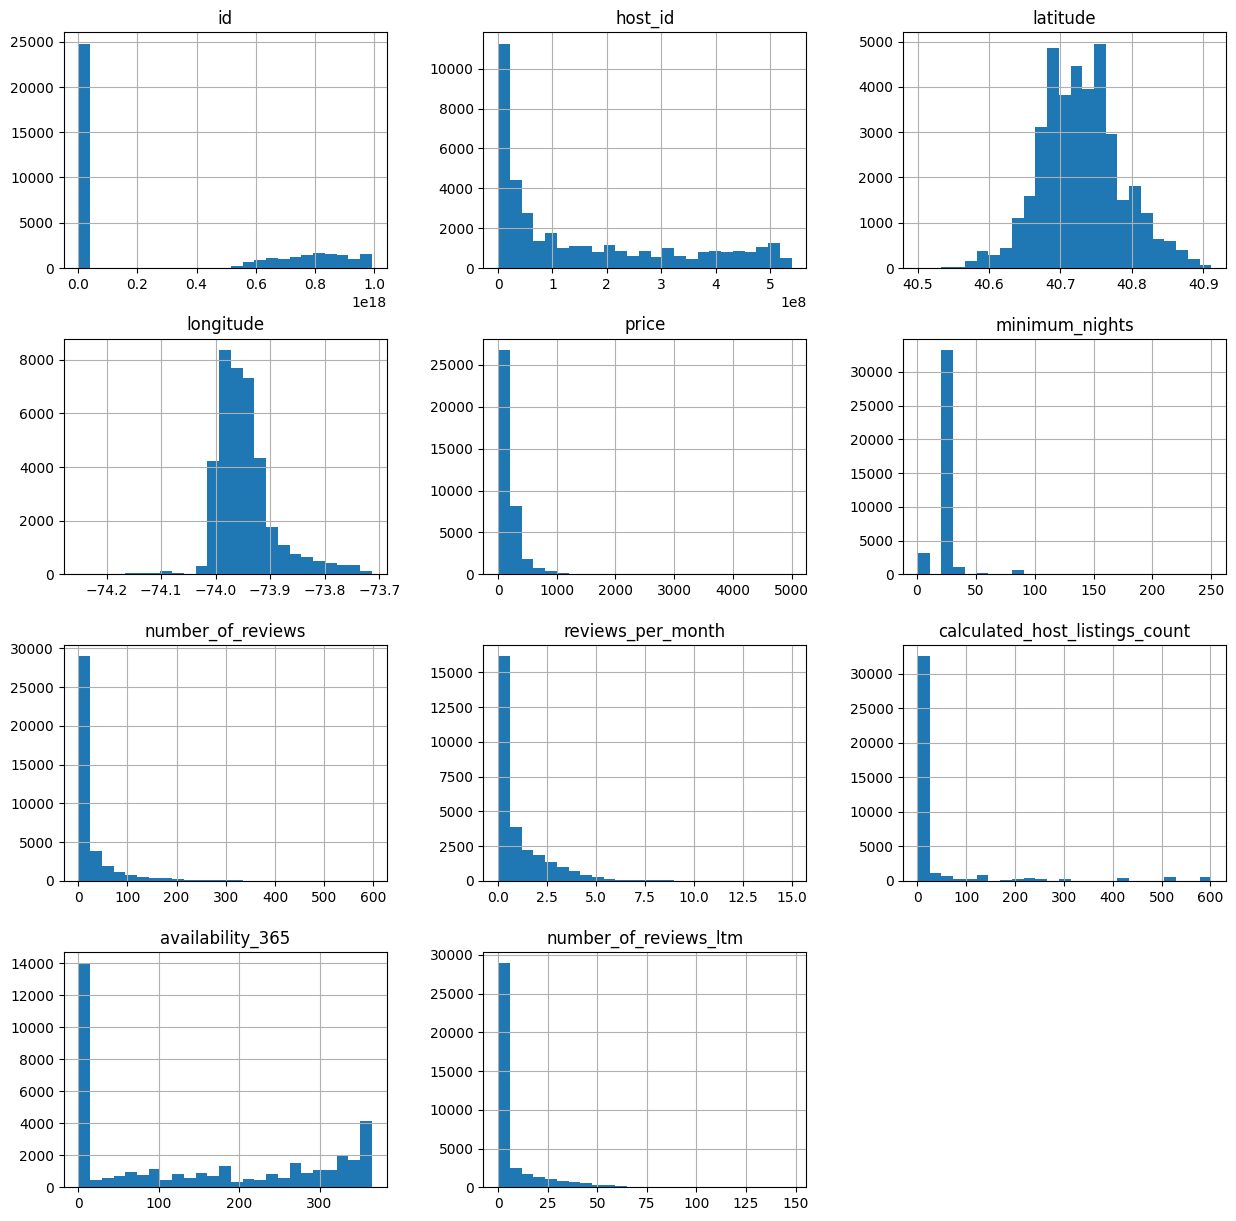

In [14]:
#Remover os outilers em um novo Dataframse
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 5000].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 250].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 600].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > 150].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 15].index, axis = 0, inplace = True)



#plotar o histograma para as variáveis numéricas
df_clean.hist(figsize=(15,15), bins = 25)

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficientes de correlação estabelecer qual a intensidade dela. Para identificar existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [15]:
#Criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews',
                 'reviews_per_month','calculated_host_listings_count','availability_365']].corr()
display(corr.round(4))

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.0000,-0.1802,-0.0362,0.0493,0.0373,0.1107
minimum_nights,-0.1802,1.0000,-0.0643,-0.1594,0.1403,-0.0357
number_of_reviews,-0.0362,-0.0643,1.0000,0.5581,-0.1431,0.1121
reviews_per_month,0.0493,-0.1594,0.5581,1.0000,-0.1069,0.2698
calculated_host_listings_count,0.0373,0.1403,-0.1431,-0.1069,1.0000,0.0768
availability_365,0.1107,-0.0357,0.1121,0.2698,0.0768,1.0000


<Axes: >

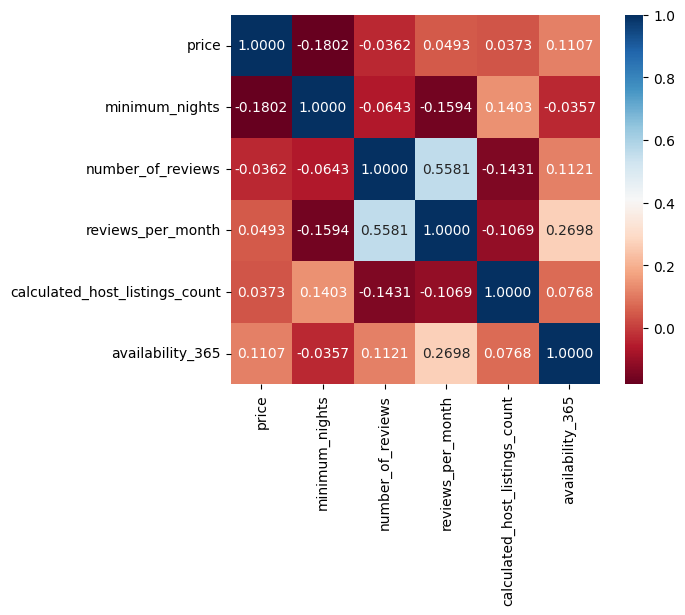

In [16]:
sns.heatmap(corr, cmap='RdBu', fmt='.4f', square=True, linecolor='white', annot=True)

É possível verificar, por exemplo, que o `price` e `minimum_nights` possuem uma correlação inversamente proporcional. O que isso significa? 

Basicamente, que conforme `price` aumenta de valor, `minimum_nights` diminue. O que parece fazer total sentido. Uma vez que quanto mais caro um imóvel for, mais difícil fica de ficar muitas noites hospedado nele. 

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/ casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos conta a ocorrências de cada tipo de aluguel usando o método `value_counts()`


In [17]:
#Mostrar a quantidade de cada tipo de imível disponível
df_clean.room_type.value_counts()

room_type
Entire home/apt    21224
Private room       16749
Shared room          490
Hotel room           131
Name: count, dtype: int64

In [18]:
#Mostrar a porcentagem de cada tipo de imovel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

room_type
Entire home/apt    54.993004
Private room       43.397938
Shared room         1.269627
Hotel room          0.339431
Name: count, dtype: float64

<Axes: title={'center': 'Porcentagem dos tipos de imóveis'}, xlabel='%', ylabel='tipo de imóvel'>

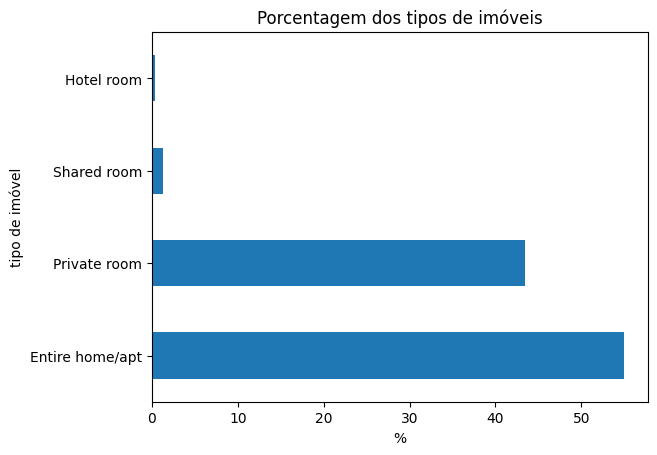

In [19]:
#Plotando gráfico
graph = df_clean.room_type.value_counts() / df_clean.shape[0] * 100
graph.plot(kind="barh", title="Porcentagem dos tipos de imóveis", xlabel="%", ylabel="tipo de imóvel")

É possível ter uma noção mais visual da tremenda diferença entre os tipos de imóveis.

### Q6.Qual os bairros mais caros de NY? 
Uma maneira de verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comprar os bairros(neighbourhood) a partir do preço médio de locação. Trazemos os 10 bairros com maiores taxas de locação

In [43]:
lista = df_clean.groupby(['neighbourhood']).price.mean().round(2).sort_values(ascending=False)[:10].to_frame()

tabela = lista.copy()
tabela.reset_index(inplace=True) #Retorna os index para cada linha


tabela.rename(columns={'neighbourhood':'Bairro', 'price':'Preço médio'}, inplace=True)
display(tabela)



,Bairro,Preço médio
0,Fort Wadsworth,800.00
1,SoHo,583.81
2,Tribeca,535.24
3,Theater District,509.40
4,Midtown,420.19
5,Navy Yard,419.17
6,Flatiron District,418.77
7,Murray Hill,400.84
8,NoHo,384.00
9,Riverdale,356.12


In [44]:
#Ver a quantidade de imóveis em cada bairro
print("{:<15} {:<10}".format("Bairro" , "Quantidade de imóveis"))
for bairro in tabela.Bairro:
    display("{:<20} {:<15}".format(bairro, df_clean[df_clean.neighbourhood == bairro].shape[0]))


#Ver as entradas
#df_clean[df_clean.neighbourhood == 'Fort Wadsworth']


Bairro          Quantidade de imóveis


'Fort Wadsworth       1              '

'SoHo                 317            '

'Tribeca              199            '

'Theater District     401            '

'Midtown              2027           '

'Navy Yard            6              '

'Flatiron District    84             '

'Murray Hill          436            '

'NoHo                 34             '

'Riverdale            8              '

É possível observar algumas distorções. O **bairro** `Fort Wadsworth` possue a maior média de preços entre todos os bairros de Nova York. Porém, ele só possue uma entrada(*apenas um imóvel do base de dados advêm deste bairro*).Então não é correto dizer que `Fort Wadsworth` é o bairro mais caro.

### Q7.Mapeando os imóveis da cidade? 

Visto que temos a as cordenadas de cada imóvel em nossa base de dados. Podemos usa-las para plotar um gráfico.

<Axes: xlabel='longitude', ylabel='latitude'>

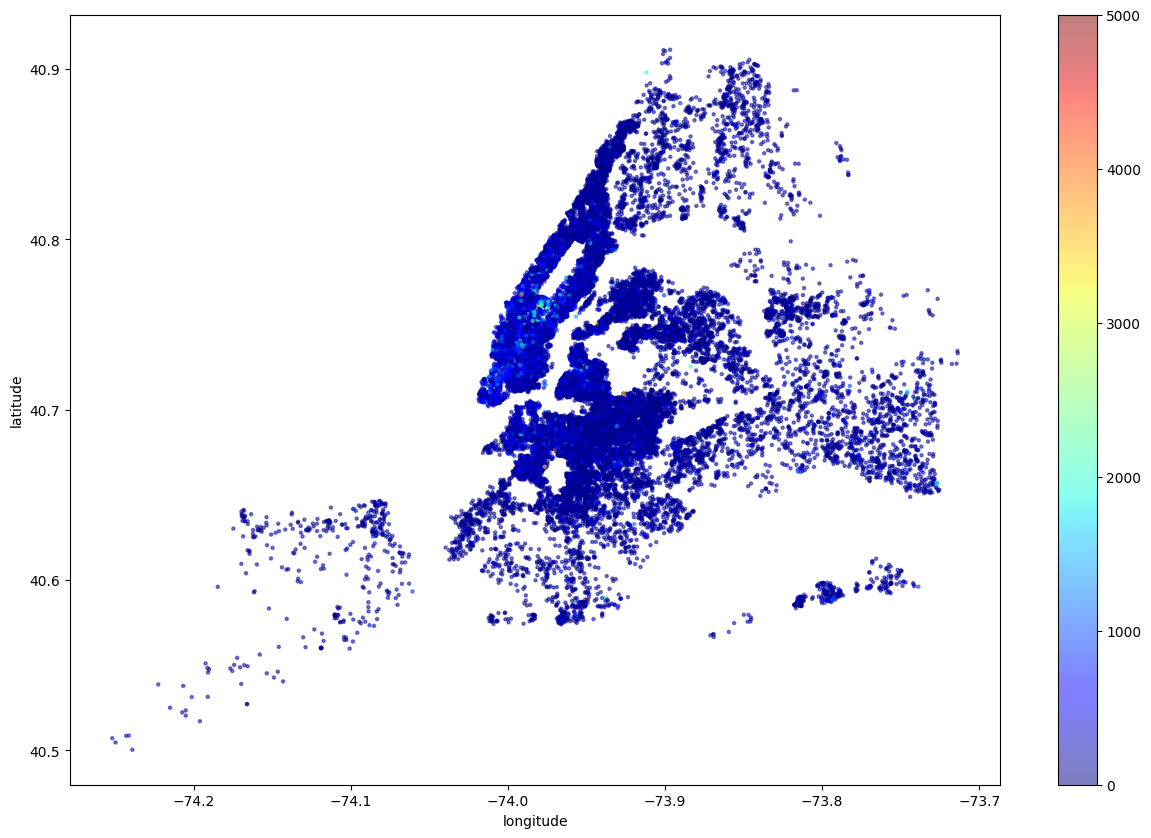

In [22]:
df_clean.plot(kind="scatter", x="longitude",y="latitude",alpha=0.5, c=df_clean['price'], s=5, cmap=plt.get_cmap('jet'), figsize=(15,10))



O espectro de cor é ditado pelo preço do imóvel.

E veja que interessante. Como tem de ser esperado. O nosso gráfico toma o formato da própria cidade de Nova York. Cada ponto representa um imóvel.
É possível ver como a cidade de Nova York possue uma alta densidade de imóveis a se alugar no `AIRBNB`
Aqui está uma foto para se comparar:

Tenha em mente que a parte a esquerda do rio Hudson, não é chamada de Nova York. E sim New Jersey, sendo outra cidade.


In [23]:
from IPython.display import Image
Image(url="https://i.ytimg.com/vi/7en2N0ibEyM/maxresdefault.jpg")

#### Manhattan


Façamos um plot mais específico, buscando dar mais ênfase a ilha de Manhattan.


<Axes: xlabel='longitude', ylabel='latitude'>

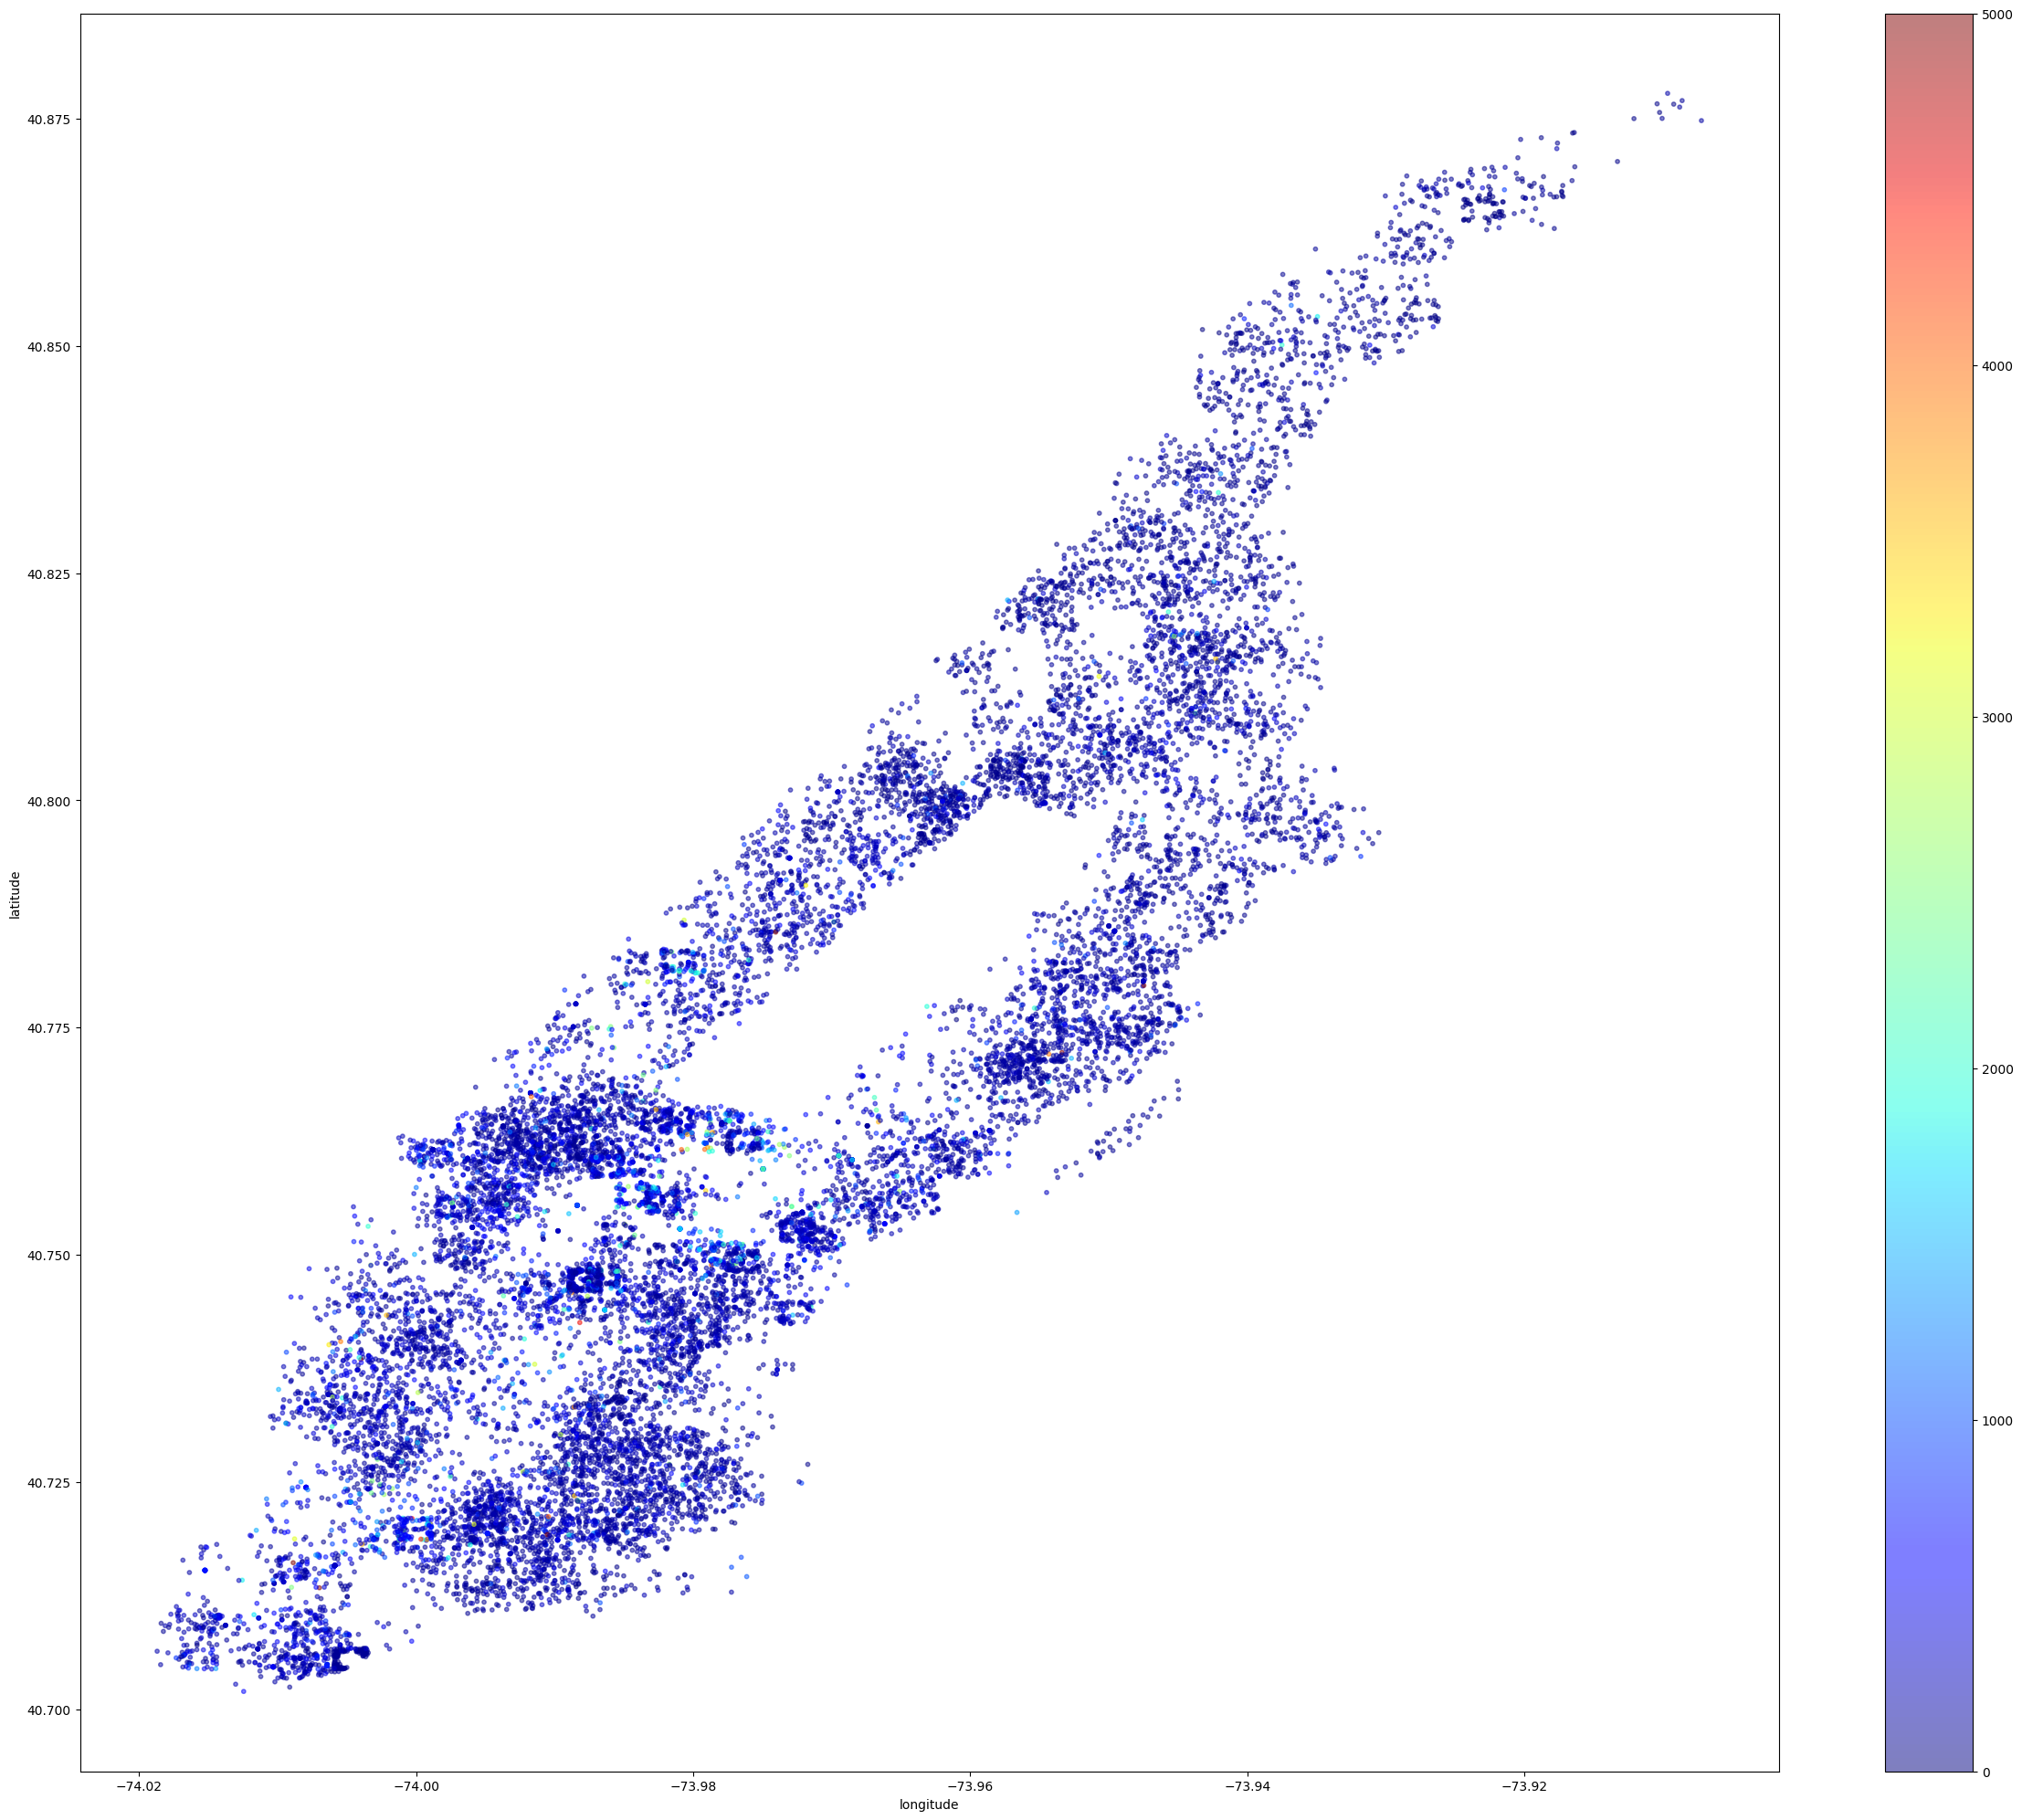

In [68]:
#liste cade neighboorhood_group
df_clean['neighbourhood_group'].unique()

#Plotar os imóveis pela latitude e longitude apenas para o neighboorhood_group = Manhattan
manhattan_df = df_clean[df_clean.neighbourhood_group == 'Manhattan']
manhattan_df.plot(kind="scatter", x="longitude",y="latitude",alpha=0.5, c=manhattan_df['price'], s=10, cmap=plt.get_cmap('jet'), figsize=(30,25))




In [48]:

print("Bairros de Manhattan: "); print(manhattan_df['neighbourhood'].unique())


bairrosMaisCaros = manhattan_df.groupby(['neighbourhood']).price.mean().round(2).sort_values(ascending=False)[:10].to_frame()

def imprimirBairrosCaros(bairros):
    tabela = bairros.copy()
    tabela.reset_index(inplace=True)
    tabela.rename(columns={'neighbourhood':'Bairro', 'price':'Preço médio'}, inplace=True)
    display(tabela)

imprimirBairrosCaros(bairrosMaisCaros)

Bairros de Manhattan: 
['Midtown' 'East Harlem' "Hell's Kitchen" 'East Village' 'Lower East Side'
 'Chelsea' 'Upper East Side' 'Kips Bay' 'Harlem' 'West Village'
 'Upper West Side' 'Morningside Heights' 'Chinatown' 'Tribeca'
 'Greenwich Village' 'Nolita' 'Washington Heights' 'Murray Hill'
 'Gramercy' 'Theater District' 'Little Italy' 'SoHo' 'Inwood'
 'Battery Park City' 'Two Bridges' 'NoHo' 'Financial District'
 'Civic Center' 'Roosevelt Island' 'Stuyvesant Town' 'Flatiron District'
 'Marble Hill']


,Bairro,Preço médio
0,SoHo,583.81
1,Tribeca,535.24
2,Theater District,509.40
3,Midtown,420.19
4,Flatiron District,418.77
5,Murray Hill,400.84
6,NoHo,384.00
7,West Village,336.38
8,Little Italy,314.58
9,Battery Park City,303.06


Plotamos um gráfico com a área do Soho

<Axes: xlabel='longitude', ylabel='latitude'>

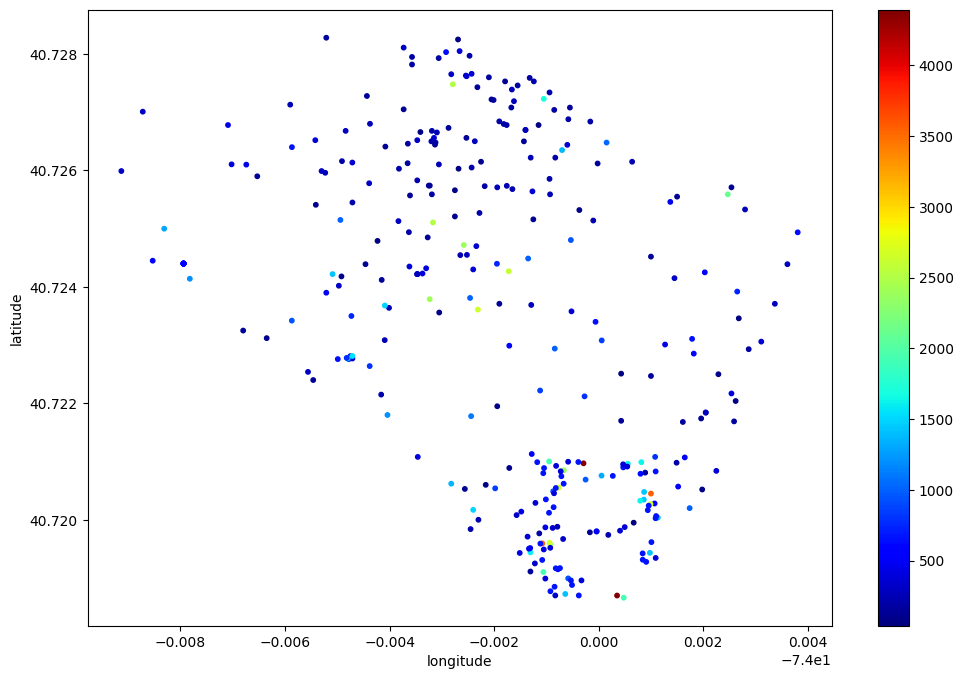

In [69]:
#Plotar os imóveis pela latitude e longitude apenas para o bairro SoHo
soho = manhattan_df[manhattan_df.neighbourhood == 'SoHo']
soho.plot(kind="scatter", x="longitude",y="latitude",alpha=1, c=soho['price'], s=10, cmap=plt.get_cmap('jet'), figsize=(12,8))

